# Customer Relationship Management

In order to ensure efficiency and effectiveness in customer relations, it is necessary to first understand what the customer needs, to develop products suitable for this need, and then to present the product to the right customer, at the right time and at the right price. In this respect, CRM is the whole of the methods used by companies to make the relationship they have established with their existing or potential customers in the most efficient, effective and ultimately most profitable.

# Why use CRM?

> Retaining existing customers is less costly than acquiring new customers. Therefore, increasing the value of our existing customers is the most important way to ensure growth.

To provide a unique customer experience (CX), you will need a complete profile of your customer. You may need all kinds of data to create a customer profile. CRM techniques; It aggregates data from a variety of sources, including email, websites, physical stores, call centers, mobile sales, marketing and advertising efforts.

Knowing who your customers are, what they want, your interactions with them in the past, and what your future interactions might look like is the focus of CRM.

# Customer Lifetime Value (CLTV)

![](https://popupsmart.com/encyclopedia/user/pages/26.customer-lifetime-value-clv/customer-lifetime-value.jpg)

“It is the total expected revenue from a company's entire lifetime relationship with a customer, less any expenses incurred for the customer.

The customer value approach requires more variable and inclusive strategies rather than a static and uniform approach. Expansion, correct sales and cross-selling techniques, monitoring customer behavior, obtaining intelligence, making strategic decisions and applying are some of the methods to be used.

You should use your customer services effectively for a positive customer experience. Every contact of the customer with your brand will be an opportunity to convey the values you will add to them.

Higher customer lifetime value means more revenue for your business. Prioritize customer lifetime value to increase your profitability.

**How is Customer Lifetime Value calculated?**

The CLTV account has many calculation metrics. Basically, the metrics to focus on are;
* Average Order Value
* Purchase Frequency
* Profit Margin
* Churn Rate
* Customer Value
* Customer Life Time Value

![](https://survicate.com/wp-content/uploads/2019/05/clv-clevertap.jpg)

# Key points to successfully apply CRM techniques:

* Deliver Personalized Experiences
* Improve Your Customer Service
* Reward the Loyalty
* Build Teams That Can Successfully Implement Your Strategy
* Use Digital Channels Effectively
* Take the First Step

In this notebook, we will do the following topics step by step, respectively:
* 1-Dataset Analysis
* 2-Customer Lifetime Value Calculation
* 3-Customer Lifetime Value Prediction

As usual, we import the libraries we will use first. 

*In this prediction model we will additionally use the lifetimes library.*

In [ ]:
pip install lifetimes

In [ ]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions

# 1) Exploring the Dataset:

In [ ]:
df = pd.read_csv("../input/online-retail-ii-uci/online_retail_II.csv")

In [ ]:
df.head()

**Variables**

InvoiceNo: Invoice number. It is a unique value. If this code starts with C, it means return

StockCode: Product code. It is unique for each product.

Description: Product name

Quantity: Number of products. It expresses how many of the products on the invoices have been sold. Those starting with C take a negative value.

InvoiceDate: Invoice date and time

UnitPrice: Product price

Customer ID: Customer number. It is a unique number for each customer

Country: The name of the country. Indicates the country where the customer lives.

In [ ]:
df.describe().T

In [ ]:
df.isnull().sum()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df["Description"].nunique()

In [ ]:
df["Description"].value_counts().head()

In [ ]:
df.groupby("Description").agg({"Quantity": "sum"}).sort_values(by="Quantity", ascending=False).head(10)

We are only interested in values greater than zero in the Quantity and Price fields. We also do not consider canceled transactions.

In [ ]:
df = df[~df["Invoice"].str.contains("C", na=False)]
df = df[(df['Quantity'] > 0)]
df = df[(df['Price'] > 0)]
df = df[df['Country'] == 'United Kingdom']

We can make outlier values in variables such as Quantity and Price more appropriate with these functions.

In [ ]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


In [ ]:
replace_with_thresholds(df, "Quantity")
replace_with_thresholds(df, "Price")

In [ ]:
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [ ]:
df.sort_values(by = 'TotalPrice', ascending = False)

# 2-Customer Lifetime Value Calculation

As a result of the following transactions and calculations, we may now calculate the value of each customer in our company.

When we evaluate our customers on an annual basis, for example, if we have the information on the annual average number of orders and how much they spend on these orders, we can calculate the Customer Life Time Value for each customer.

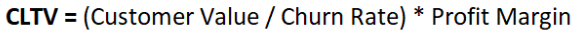

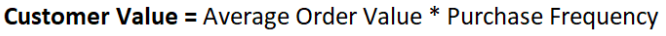

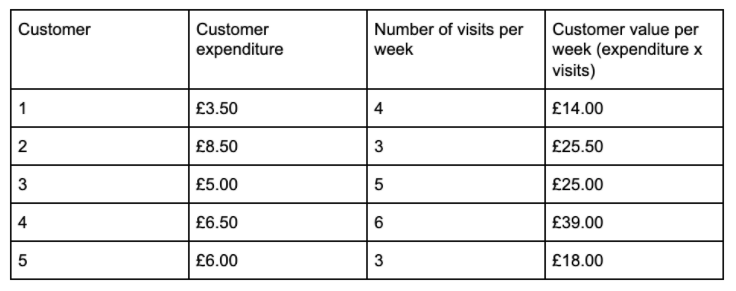

Average customer expenditures per visit (S) = £5.90 
The purchase cycle (C) = 4.2 
Average customer value / week (A) = £24.30 

When you have estimated your variables you will have to take into account some constants. These are:

**1. Average customer lifespan (T) – How long, based on your experience, do customers remain your customers?**

Calculate Churn Rate %:

CB – Customers at the beginning of a period

CE – Customers at the end of a period

If you had 100 customers at the start of the period, and 95 customers at the end of the period, your churn rate would be:

Churn rate (%) = (100-95)/100 = 5/100

= 5%

T = 1 / 5% 

= 1 / 0.05 = 20

**2. Discount rate (I) – No, this is not your customer’s discount. You are projecting a value, into the future, but you’ll have to adapt this value to present tense. Simply put – the value of a certain good in the future is lower than that of one you are holding in your hands today. This is the interest rate used in discounted cash flow analysis to determine the present value of future cash flows. Confused? Go with a standard 10% rate.**

**3. Customer retention rate (R) – How many of your customers come back to your store and purchase from you, compared to the previous, equal amount of time?**

CE = customers at the end of a period of time
CN = customers acquired during a period of time
CB = customers at the beginning of a period of time
Say you had:

CE = 95

CN = 20

CB = 100

R = ((95-20) / 100) × 100 

= (75 / 100) × 100 

= 0.75 × 100

= 75%

**4. Profit Margin (P)**

Total revenue: £500

Cost of sales: £393.45

P = ((500-393.45) / 500) x 100 = 21.3%

**5. Average Gross Margin per Customer Lifespan (M) – the gross profit per customer expected in the given average lifespan.**

M = 21.3%( 52(24.30) x 20)

=£5,382.94




Simple Customer Lifetime Value Formula: 

= 52(24.30) x 20

= £25,272


**NOTE: the number 52 comes from the number of weeks in a year.**

[1]

# However!!! 

* **This calculation will represent a single time period. It will also only represent the time the analysis was made.**

* **In these formulas, Total Price is the dominant factor and will suppress the frequency. This leads to the fact that the number of transactions will not matter once the customer has earned the same price to the company.**

* **Churn rate comes from all customer base. It will not be personal. Likewise, Profit is not specific to the customer, coming from the entire customer base.**

For all these reasons, we need a more comprehensive model. For this, we will use BG-NBD and Gamma-Gamma models.

# Let's prepare the dataset for CLTV Prediction

In [ ]:
today_date = pd.to_datetime(df['InvoiceDate'].max()) + pd.DateOffset(days=2)

In [ ]:
cltv_df = df.groupby('Customer ID').agg(
        {'InvoiceDate': [lambda InvoiceDate: (today_date - pd.to_datetime(InvoiceDate).max()).days,
                         lambda InvoiceDate: (today_date - pd.to_datetime(InvoiceDate).min()).days],
         'Invoice': lambda Invoice: Invoice.nunique(),
         'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

In [ ]:
cltv_df.columns = cltv_df.columns.droplevel(0)
cltv_df.columns = ['recency', 'T', 'frequency', 'monetary']
cltv_df.head()

In [ ]:
cltv_df.sort_values(by = 'monetary', ascending = False)

We need to calculate the average profit:

In [ ]:
cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]

To build our forecasting model, we need to select **customers who make us multiple purchases**.

In [ ]:
cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

BG/NBD model asks us for *recency* and *T* **weekly**

In [ ]:
cltv_df["recency"] = cltv_df["recency"] / 7
cltv_df["T"] = cltv_df["T"] / 7

In [ ]:
cltv_df.sort_values(by = "monetary", ascending = False)

**Columns We Have Created**


Recency : It is equal to the duration between a customers first purchase and their last purchase.

T (Age of the customer): It is equal to the duration between a customer's first purchase and the last day in the dataset. 

Frequency: The number of periods in which the customer has made a repeat purchase.

Monetary: The profitability value of the customer's relationship with the company.

# 3-Customer Lifetime Value Prediction

The most important issue in this section is the need to predict the potential values ​​of our new customers.

Whether our customer has just come and purchased 1–2 products, we want to assign a value to this customer. So we need to make an estimation of whether this future customer is very valuable or unimportant to us.

If we can predict this situation, we can follow a marketing strategy with the customer accordingly. In this case, making CLTV Prediction for the future is at a very important point in CRM studies. Another need here is this: Although we have the average revenue and purchasing frequency of the customer, the reason why we cannot make forward forecasts is,
For the company, we do not have the behavioral distribution of all customers. In addition, we cannot make an estimation for individuals based on this probability distribution.
With BG-NBD and Gamma-Gamma models, we will solve this problem and make forward-looking predictions.

# BG-NBD Model

![](https://miro.medium.com/max/1838/0*ZUepkV0FnvKzRsIU)

In [ ]:
bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(cltv_df['frequency'], cltv_df['recency'], cltv_df['T'])

Who are the **10 customers** we expect the **most to purchase in a week?**

In [ ]:
bgf.conditional_expected_number_of_purchases_up_to_time(1,
                                                        cltv_df['frequency'],
                                                        cltv_df['recency'],
                                                        cltv_df['T']).sort_values(ascending=False).head(10)

Who are the **10 customers** we expect the **most to purchase in a month?**

In [ ]:
bgf.predict(4,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T']).sort_values(ascending=False).head(10)

What is the Expected Number of Sales of the Whole Company in **3 Months?**

In [ ]:
bgf.predict(4 * 3,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T']).sum()

What is the Expected Number of Sales of the Whole Company in **1 Months?**

In [ ]:
bgf.predict(4,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T']).sum()

Let's add columns to the data set, where we can observe the purchasing behavior of customers in 1 week, 1 month and 3-month periods. 

> The BGNBD model only gives an idea about the purchase frequency. It does not produce a conclusion about profitability.

In [ ]:
    cltv_df["expected_purc_1_week"] = bgf.predict(1,
                                                  cltv_df['frequency'],
                                                  cltv_df['recency'],
                                                  cltv_df['T'])

    cltv_df["expected_purc_1_month"] = bgf.predict(4,
                                                   cltv_df['frequency'],
                                                   cltv_df['recency'],
                                                   cltv_df['T'])

    cltv_df["expected_purc_3_month"] = bgf.predict(12,
                                                   cltv_df['frequency'],
                                                   cltv_df['recency'],
                                                   cltv_df['T'])

 Let's bring the customers with high frequency and monetary values for 1 week projection.

In [ ]:
cltv_df.sort_values("expected_purc_1_week", ascending=False).head(10)

# Gamma-Gamma Model

![](https://miro.medium.com/max/700/1*YjLKQnJE3wr7LQlovO78iQ.png)

It is used for the estimation of the conditional expected average profit in a certain period of time.

In [ ]:
ggf = GammaGammaFitter(penalizer_coef=0.01) 
ggf.fit(cltv_df['frequency'], cltv_df['monetary'])
cltv_df["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv_df['frequency'], cltv_df['monetary'])

There is no relationship between purchasing frequency and the calculated monetary value.
The average calculated value differs for each customer.

# Calculation of CLTV with BG-NBD and GG model.

Now let's set up a model that makes a 6-month CLTV prediction by combining our BG-NBD and Gamma-Gamma model. As a result, we will bring our customers who are most likely to shop in a 6-month projection.

In [ ]:
cltv = ggf.customer_lifetime_value(bgf,
                                       cltv_df['frequency'],
                                       cltv_df['recency'],
                                       cltv_df['T'],
                                       cltv_df['monetary'],
                                       time=6, # Prediction for 6 months   
                                       freq="W",  # Frequency of T.
                                       discount_rate=0.01)

We merge the CLTV value we have calculated into the df we use. So add it as a colon.

In [ ]:
cltv = cltv.reset_index()
cltv_final = cltv_df.merge(cltv, on="Customer ID", how="left")

In [ ]:
cltv_final.head()

# Scaling CLV Values

We scale them between 1 and 0 so that the values we get can give an idea of size and smallness, so it provides us with information without any calculations.

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(cltv_final[["clv"]])
cltv_final["scaled_clv"] = scaler.transform(cltv_final[["clv"]])
cltv_final.sort_values(by="scaled_clv", ascending=False).head(10)

## Segmentation of Scaled CLV Values 

We divide the final values we get into segments so that we can apply different strategies for each group.

In [ ]:
cltv_final["segment"] = pd.qcut(cltv_final["clv"], 4, labels=["D", "C", "B", "A"])
cltv_final.sort_values(by="scaled_clv", ascending=False)

To work on segments, we can group according to their mean, count and sum values. Thus, we will have obtained very useful insights for each group before the marketing actions we will take.

In [ ]:
cltv_final.describe().T

# References:
[1] https://www.seedrs.com/academy/how-to-calculate-customer-lifetime-value/

[2] Fader, P. S., Hardie, B. G., & Lee, K. L. (2008). Computing P (alive) using the BG/NBD model.

[3] Jasek, P., Vrana, L., Sperkova, L., Smutny, Z., & Kobulsky, M. (2019). Comparative analysis of selected probabilistic customer lifetime value models in online shopping. Journal of Business Economics and Management, 20(3), 398-423.

[4] Venkatakrishna, M. R., Mishra, M. P., & Tiwari, M. S. P. Customer Lifetime Value Prediction and Segmentation using Machine Learning.
